In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## deleting unimportant columns 
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
df.shape

(891, 9)

In [6]:
## checking the missing values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
## after calculating the missing values, in Cabin column there are many missing values so we have to delete that column.
df.drop('Cabin',axis=1,inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


AttributeError: 'numpy.int64' object has no attribute 'startswith'

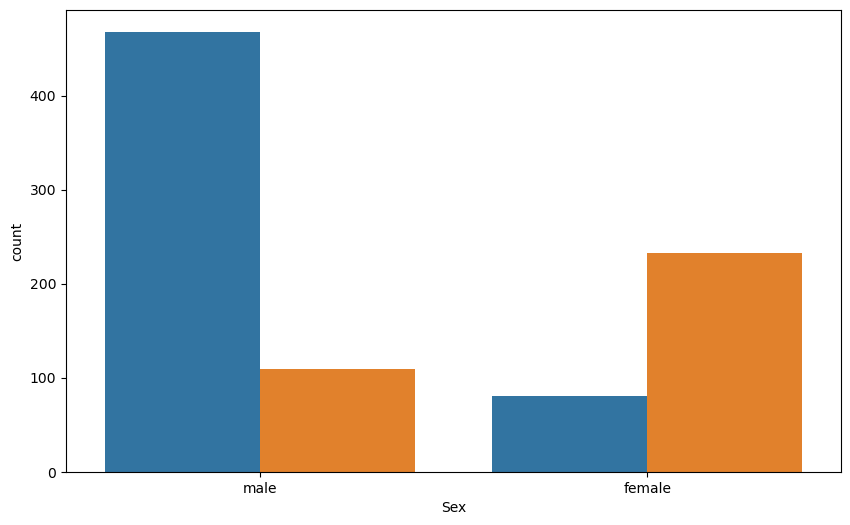

In [9]:
plt.figure(figsize = (10,6))
sns.countplot(data=df,x='Sex',hue='Survived')

According to the above count plot, i conclude that the most of the females survives.

<Axes: ylabel='Survived'>

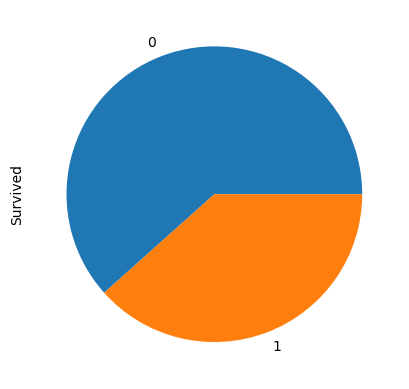

In [10]:
df['Survived'].value_counts().plot(kind='pie')

According to the pie chart, we conclude that the most of the are not survived during the titanic sank.

<Axes: >

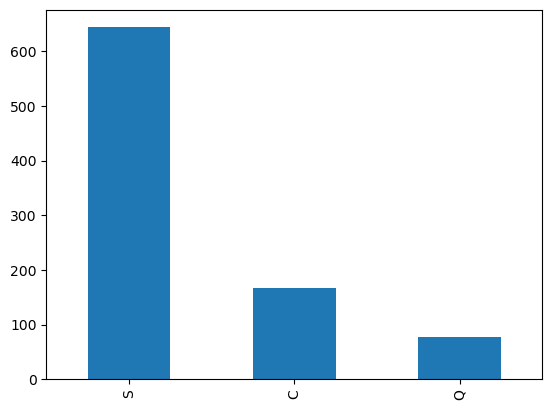

In [11]:
df['Embarked'].value_counts().plot(kind='bar')

In [12]:
## segregating categorical and numerical features 
cat_col = ['Sex','Embarked']
num_col = ['Pclass','Age','SibSp','Parch','Fare']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
num_pipeline = Pipeline(steps = [ ('imputer',SimpleImputer(strategy = 'mean')),
                                 ('scaler', StandardScaler())
                                ])

cat_pipeline = Pipeline(steps = [ ('imputer',SimpleImputer(strategy='most_frequent')),
                                 ('encoder',OneHotEncoder(sparse=False)),
                                 ('scaler', StandardScaler())
                                ])
                                 

In [15]:
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_col),
    ('cat_pipeline',cat_pipeline,cat_col)
])
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['Sex', 'Embarked'])])

In [16]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [17]:
## spliting the data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=12)

In [18]:
x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)
x_train_scaled

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.83838258,  0.        , -0.45828507, ..., -0.47309545,
         3.13629776, -1.62300534],
       [-0.37442329, -0.09260747, -0.45828507, ..., -0.47309545,
        -0.31884728,  0.61614092],
       [ 0.83838258,  0.        , -0.45828507, ..., -0.47309545,
        -0.31884728,  0.61614092],
       ...,
       [-1.58722915,  0.54404883,  0.4521746 , ..., -0.47309545,
        -0.31884728,  0.61614092],
       [ 0.83838258,  0.        , -0.45828507, ..., -0.47309545,
        -0.31884728,  0.61614092],
       [ 0.83838258,  0.42467577, -0.45828507, ...,  2.11373837,
        -0.31884728, -1.62300534]])

In [19]:
x_test_scaled

array([[-1.58722915,  2.85192792, -0.45828507, ..., -0.47309545,
        -0.31884728,  0.61614092],
       [-1.58722915,  0.        , -0.45828507, ..., -0.47309545,
        -0.31884728,  0.61614092],
       [ 0.83838258, -0.64968174, -0.45828507, ..., -0.47309545,
        -0.31884728,  0.61614092],
       ...,
       [ 0.83838258,  0.        , -0.45828507, ..., -0.47309545,
         3.13629776, -1.62300534],
       [-1.58722915, -0.09260747, -0.45828507, ..., -0.47309545,
        -0.31884728,  0.61614092],
       [ 0.83838258,  0.        ,  0.4521746 , ...,  2.11373837,
        -0.31884728, -1.62300534]])

## Model Building

In [20]:
from xgboost import XGBClassifier
xgb =XGBClassifier()

In [21]:
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
pred = xgb.predict(x_test_scaled)

## performance matrix

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       178
           1       0.74      0.66      0.70       117

    accuracy                           0.77       295
   macro avg       0.77      0.75      0.76       295
weighted avg       0.77      0.77      0.77       295



In [25]:
accuracy_score(y_test,pred)

0.7728813559322034

In [26]:
confusion_matrix(y_test,pred)

array([[151,  27],
       [ 40,  77]], dtype=int64)

## HyperParameter Tuning using GridSearchCV

In [27]:
params = { 'n_estimators' : [50,100,200,],
          'max_depth' : [4,5,6],
          'learning_rate' : [0.1,0.2,0.3,1],
          'booster' : ['gbtree','gblinear','dart']
         }

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid = GridSearchCV(XGBClassifier(),param_grid = params, verbose=3,cv=5,scoring='accuracy')
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END booster=gbtree, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.792 total time=   0.0s
[CV 2/5] END booster=gbtree, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.849 total time=   0.0s
[CV 3/5] END booster=gbtree, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.882 total time=   0.0s
[CV 4/5] END booster=gbtree, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.840 total time=   0.0s
[CV 5/5] END booster=gbtree, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.840 total time=   0.0s
[CV 1/5] END booster=gbtree, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.792 total time=   0.0s
[CV 2/5] END booster=gbtree, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.849 total time=   0.0s
[CV 3/5] END booster=gbtree, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.874 total time=   0.0s
[CV 4/5] END booster=gbtree, learning_rate=0.1, max_de

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 1/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.790 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.792 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.798 total t

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 5/5] END booster=gblinear, learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.790 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.792 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.849 total t

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 4/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.849 total time=   0.0s


C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 4/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.790 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.792 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.782 total t

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 3/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.849 total time=   0.0s


C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 4/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_depth=4, n_estimators=50;, score=0.792 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.2, max_depth=4, n_estimators=50;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.2, max_depth=4, n_estimators=50;, score=0.857 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.2, max_depth=4, n_estimators=50;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.2, max_depth=4, n_estimators=50;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_depth=4, n_estimators=100;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.2, max_depth=4, n_estimators=100;, score=0.782 total t

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 5/5] END booster=gblinear, learning_rate=0.2, max_depth=4, n_estimators=200;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.792 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.857 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.849 total t

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 1/5] END booster=gblinear, learning_rate=0.2, max_depth=6, n_estimators=50;, score=0.792 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.2, max_depth=6, n_estimators=50;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.2, max_depth=6, n_estimators=50;, score=0.857 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.2, max_depth=6, n_estimators=50;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.2, max_depth=6, n_estimators=50;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_depth=6, n_estimators=100;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.2, max_depth=6, n_estimators=100;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.2, max_depth=6, n_estimators=100;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.2, max_depth=6, n_estimators=100;, score=0.798 total t

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 4/5] END booster=gblinear, learning_rate=0.3, max_depth=4, n_estimators=50;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.3, max_depth=4, n_estimators=50;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.3, max_depth=4, n_estimators=100;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.3, max_depth=4, n_estimators=100;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.3, max_depth=4, n_estimators=100;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.3, max_depth=4, n_estimators=100;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.3, max_depth=4, n_estimators=100;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.3, max_depth=4, n_estimators=200;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.3, max_depth=4, n_estimators=200;, score=0.782 tota

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 3/5] END booster=gblinear, learning_rate=0.3, max_depth=6, n_estimators=100;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.3, max_depth=6, n_estimators=100;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.3, max_depth=6, n_estimators=100;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.3, max_depth=6, n_estimators=200;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.3, max_depth=6, n_estimators=200;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.3, max_depth=6, n_estimators=200;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.3, max_depth=6, n_estimators=200;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.3, max_depth=6, n_estimators=200;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=1, max_depth=4, n_estimators=50;, score=0.625 total

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 5/5] END booster=gblinear, learning_rate=1, max_depth=4, n_estimators=100;, score=0.622 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=1, max_depth=4, n_estimators=200;, score=0.625 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=1, max_depth=4, n_estimators=200;, score=0.378 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=1, max_depth=4, n_estimators=200;, score=0.622 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=1, max_depth=4, n_estimators=200;, score=0.378 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=1, max_depth=4, n_estimators=200;, score=0.622 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=50;, score=0.375 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=50;, score=0.378 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=50;, score=0.622 total time=   0.0s
[CV 

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 3/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=100;, score=0.622 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=100;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=100;, score=0.622 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=200;, score=0.375 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=200;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=200;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=200;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=1, max_depth=5, n_estimators=200;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=50;, score=0.625 total time=   0.0s
[C

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 2/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=100;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=100;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=100;, score=0.798 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=100;, score=0.807 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=200;, score=0.783 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=200;, score=0.782 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=200;, score=0.849 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=200;, score=0.622 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=1, max_depth=6, n_estimators=200;, score=0.807 total time=   0.0s


C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SANKET-PC\anaconda3\Lib\site-packages\xgboost\

[CV 1/5] END booster=dart, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.792 total time=   0.1s
[CV 2/5] END booster=dart, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.849 total time=   0.0s
[CV 3/5] END booster=dart, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.882 total time=   0.0s
[CV 4/5] END booster=dart, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.840 total time=   0.1s
[CV 5/5] END booster=dart, learning_rate=0.1, max_depth=4, n_estimators=50;, score=0.840 total time=   0.1s
[CV 1/5] END booster=dart, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.792 total time=   0.6s
[CV 2/5] END booster=dart, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.849 total time=   0.5s
[CV 3/5] END booster=dart, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.874 total time=   0.6s
[CV 4/5] END booster=dart, learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.807 total time=   0.5s
[CV 5/5] END booster=dar

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.1, 0.2, 0.3, 1],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=3)

In [30]:
grid.best_params_

{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

In [31]:
clf = XGBClassifier(n_estimators = 50, max_depth =4, learning_rate=0.1, booster = 'gbtree')
clf.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred = clf.predict(x_test_scaled)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       178
           1       0.80      0.61      0.69       117

    accuracy                           0.78       295
   macro avg       0.79      0.75      0.76       295
weighted avg       0.79      0.78      0.78       295



In [34]:
## Light Boosting
!pip install lightgbm

In [35]:
import lightgbm as gbm

In [36]:
d_train = gbm.Dataset(x_train_scaled, label = y_train)
d_train

In [37]:
params = {}

params['learning_rate'] = 0.002    #,0.1,0.3
params['boosting_type'] = 'gbdt' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [38]:
clf1 = gbm.train(params, d_train, 1400)

[LightGBM] [Info] Number of positive: 225, number of negative: 371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377517 -> initscore=-0.500102
[LightGBM] [Info] Start training from score -0.500102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [39]:
y_pred1 = clf1.predict(x_test_scaled)
y_pred1

array([0.2943083 , 0.30444532, 0.11941043, 0.35063854, 0.09840458,
       0.2943083 , 0.50579868, 0.49860335, 0.25036455, 0.14921516,
       0.29248236, 0.13880928, 0.14226414, 0.50492395, 0.61810944,
       0.21116321, 0.19229174, 0.31679438, 0.12557654, 0.08115619,
       0.24562242, 0.1451051 , 0.13202932, 0.46332818, 0.53067366,
       0.30471723, 0.85282332, 0.6438938 , 0.16460797, 0.87915485,
       0.12866211, 0.11239389, 0.65208057, 0.1006606 , 0.14945619,
       0.86105173, 0.10910189, 0.15162351, 0.13144396, 0.4648716 ,
       0.10121911, 0.25241728, 0.88434187, 0.51978372, 0.20671785,
       0.09881595, 0.84907858, 0.11647468, 0.15075061, 0.25235748,
       0.28081141, 0.91636435, 0.88272966, 0.3690373 , 0.08115619,
       0.08115619, 0.12788589, 0.88109522, 0.47830405, 0.32110698,
       0.21382204, 0.40771163, 0.61810944, 0.29738148, 0.17314378,
       0.91503207, 0.82477761, 0.47420359, 0.15537789, 0.1262123 ,
       0.13880928, 0.1154591 , 0.15024506, 0.29744705, 0.65208

In [40]:
predictions = [round(value) for value in y_pred]
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       178
           1       0.80      0.61      0.69       117

    accuracy                           0.78       295
   macro avg       0.79      0.75      0.76       295
weighted avg       0.79      0.78      0.78       295



## Test Data

In [42]:
df2 = pd.read_csv('titanic_test.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [44]:
## deleting unimportant columns 
id = df2['PassengerId']
df2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [46]:
test_scaled = preprocessor.fit_transform(df2)
test_scaled

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.87348191,  0.3349926 , -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       [ 0.87348191,  1.32553003,  0.61699237, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [-0.31581919,  2.51417495, -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       ...,
       [ 0.87348191,  0.65196458, -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191,  0.        , -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191,  0.        ,  0.61699237, ...,  1.76012477,
        -0.35164743, -1.35067551]])

## for Xgboost

In [47]:
predictions = clf.predict(test_scaled)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
data = { 'PassengerId' : id, 'Survived' : predictions}

In [49]:
pred = pd.DataFrame(data)
pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


## for LGBM

In [50]:
pred = clf1.predict(test_scaled)
pred

array([0.18070345, 0.43690676, 0.1526498 , 0.12556492, 0.41917625,
       0.24827677, 0.63204708, 0.25066624, 0.57656331, 0.12764704,
       0.10423471, 0.24338683, 0.83365485, 0.1475225 , 0.8541641 ,
       0.84106282, 0.1981539 , 0.1528263 , 0.36789951, 0.60319304,
       0.28885599, 0.25866314, 0.87300882, 0.40224075, 0.89311546,
       0.13018303, 0.89553554, 0.13171113, 0.33651494, 0.14682916,
       0.1475225 , 0.17430356, 0.52859735, 0.48831322, 0.30945902,
       0.24175945, 0.474675  , 0.42866067, 0.12788776, 0.16481805,
       0.21421866, 0.24623446, 0.14390416, 0.83994525, 0.84891672,
       0.1046148 , 0.28525121, 0.13837483, 0.89331594, 0.57990574,
       0.28866507, 0.14820156, 0.80106805, 0.82069288, 0.14741663,
       0.35281492, 0.14686502, 0.10311775, 0.12585916, 0.91503207,
       0.20641623, 0.17686391, 0.20016983, 0.57398599, 0.5117958 ,
       0.86299219, 0.58606968, 0.26636511, 0.24177716, 0.85863692,
       0.57358194, 0.11844043, 0.43369092, 0.2499812 , 0.91595

In [51]:
pred1 = [round(value) for value in pred]
pred1

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [52]:
data2 = { 'PassengerId' : id, 'Survived' : pred1}

In [53]:
new_predict = pd.DataFrame(data2)
new_predict

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
